In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h1>Import Dependencies</h1>

In [2]:
# Math and dataframe modules
import numpy as np

# Stats module
import statsmodels.api as sm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Formats plots and uses seaborn theme
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Store data
%store -r dataframe
%store -r model_fit
%store -r model_norm_residuals

<h1>Residuals vs Leverage</h1>

<div style="font-size:16px; border:1px solid black; padding:10px">
<font color="blue">Explained</font>
<ul>
<li>This plot helps us to find influential extreme values</li>
<li>Extreme values that could potential affect the regression model would be outlying values at the upper right corner or at the lower right corners of the plot.</li>
<li>Cook’s distance is used at a cutoff point, any points beyond this distance are influential to the regression results, and if these values are removed, would alter the results.</li>    
<li>Seabon regplot can be used to plot data and a linear regression model fit.:<br><strong><code>seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)</code></strong></li>
<li>Additional information: <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html">Documentation</a></li>
</ul>
</div>

In [3]:
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [4]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

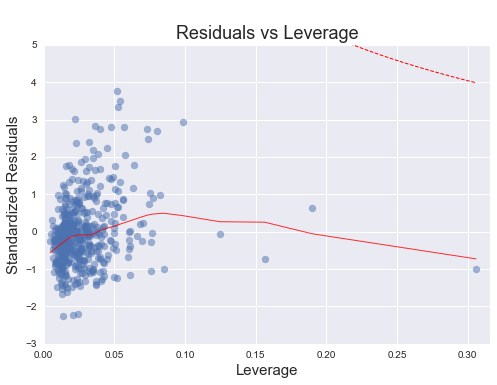

In [5]:
res_leverage = plt.figure();
p = len(model_fit.params)
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance')
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
res_leverage.axes[0].set_xlim(0, max(model_leverage)+0.01)
res_leverage.axes[0].set_ylim(-3, 5)
res_leverage.axes[0].set_title('Residuals vs Leverage')
res_leverage.axes[0].set_xlabel('Leverage')
res_leverage.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    res_leverage.axes[0].annotate(i,
                             xy=(model_leverage[i],
                                 model_norm_residuals[i]))

<div style="font-size:16px; border:1px solid black; padding:10px">
<font color="blue">Observations:</font>
<ul>
<li>No scatter points are located beyond the red dashed cook's line in the upper right corner.</li>
</ul>
<font color="blue">Preliminary Conclusion:</font>
<ul>
<li>There does not appear to be extreme influencial values that can affect the results of the regression.</li>
</ul>    
</div>